## Data Cleaning and Pre-Processing

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing data from the csv file
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

# print(data)

In [3]:
# checking for null values in the data
null_values = data[data.isnull().any(axis=1)]
print(null_values.to_string())

Empty DataFrame
Columns: [Year, Country, Region, Crop_Type, Average_Temperature_C, Total_Precipitation_mm, CO2_Emissions_MT, Crop_Yield_MT_per_HA, Extreme_Weather_Events, Irrigation_Access_%, Pesticide_Use_KG_per_HA, Fertilizer_Use_KG_per_HA, Soil_Health_Index, Adaptation_Strategies, Economic_Impact_Million_USD]
Index: []


In [4]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [5]:
for col in numeric_cols:
    data[col] = data[col].astype(float)

## Exploring and Analysing Data

In [6]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  float64
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  float64
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [7]:
# summary statistics of the numerical columns
data.describe()

Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25%            7.760000              1.449000                2.000000   
50%           15.200000              2.170000                5.000000   
75%           22.820000              2.930000                8.000000   
max           30.000000              5.000000               10.000000   

       Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
count         10000.000000             10000.000000              10000.000000   
mean             55.248332                24.955735                 49.973708   
std              25.988305                14.490962                 28.711027   
min              10.010000                 0.000000                  0.010000   
25%              32.677500                12.527500                 25.390000   
50%              55.175000                24.930000                 49.635000   
75%              77.582500                37.470000                 74.825000   
max              99.990000                49.990000                 99.990000   

       Soil_Health_Index  Economic_Impact_Million_USD  
count       10000.000000                 10000.000000  
mean           64.901278                   674.269658  
std            20.195882                   414.591431  
min            30.000000                    47.840000  
25%            47.235000                   350.545000  
50%            64.650000                   583.920000  
75%            82.472500                   917.505000  
max           100.000000                  2346.470000

In [8]:
# Finding all the unique regions
data['Region'].unique()

array(['West Bengal', 'North', 'Ile-de-France', 'Prairies', 'Tamil Nadu',
       'Midwest', 'Northeast', 'New South Wales', 'Punjab', 'North West',
       'South East', 'Grand Est', 'Northwestern', 'Siberian', 'Northwest',
       'Victoria', 'Nouvelle-Aquitaine', 'South', 'Quebec', 'Southeast',
       'Ontario', 'East', 'Pampas', 'Western Australia', 'Volga',
       'Maharashtra', 'Provence-Alpes-Cote d’Azur', 'West', 'Central',
       'North Central', 'Patagonia', 'Queensland', 'South West',
       'British Columbia'], dtype=object)

In [9]:
# Finding the frequency of individual regions
data['Region'].value_counts()

Region
South                         754
Northeast                     752
North                         524
Central                       466
Punjab                        288
Victoria                      283
New South Wales               276
East                          273
South West                    270
Ontario                       269
West Bengal                   267
North West                    264
Volga                         261
South East                    260
West                          257
Grand Est                     254
Queensland                    253
Midwest                       253
Nouvelle-Aquitaine            252
Patagonia                     249
Tamil Nadu                    249
Northwest                     247
Siberian                      246
Prairies                      243
British Columbia              242
Provence-Alpes-Cote d’Azur    236
Ile-de-France                 236
North Central                 235
Quebec                        230
Northwestern                  227
Pampas                        224
Maharashtra                   221
Western Australia             220
Southeast                     219
Name: count, dtype: int64

## Data Visualizations

In [10]:
# importing required libraries
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

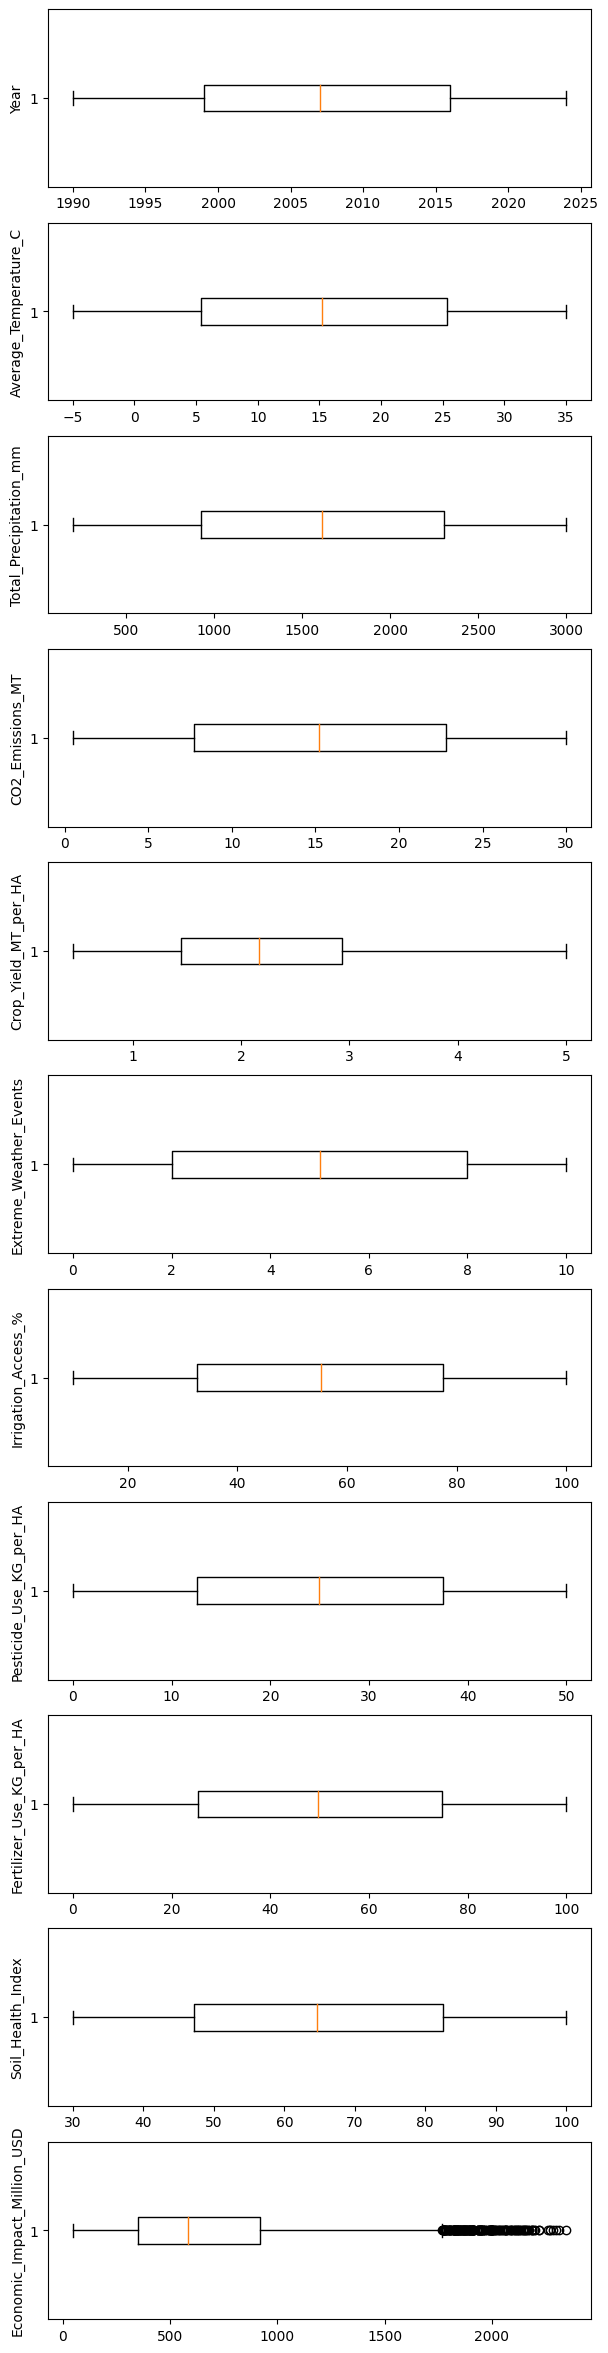

In [11]:
# Plotting a box plot before removing the outliners
fig, axs = plt.subplots(11, 1, figsize=(7, 30))

for i, col in enumerate(numeric_cols):
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)

plt.show()

#### Removing Outliners

In [12]:
def remove_outliers(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filter the DataFrame to exclude outliers
        data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]
    return data

In [13]:
cleaned_data = remove_outliers(data)

cleaned_data_numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(cleaned_data_numeric_cols)


#### Plotting the graphs

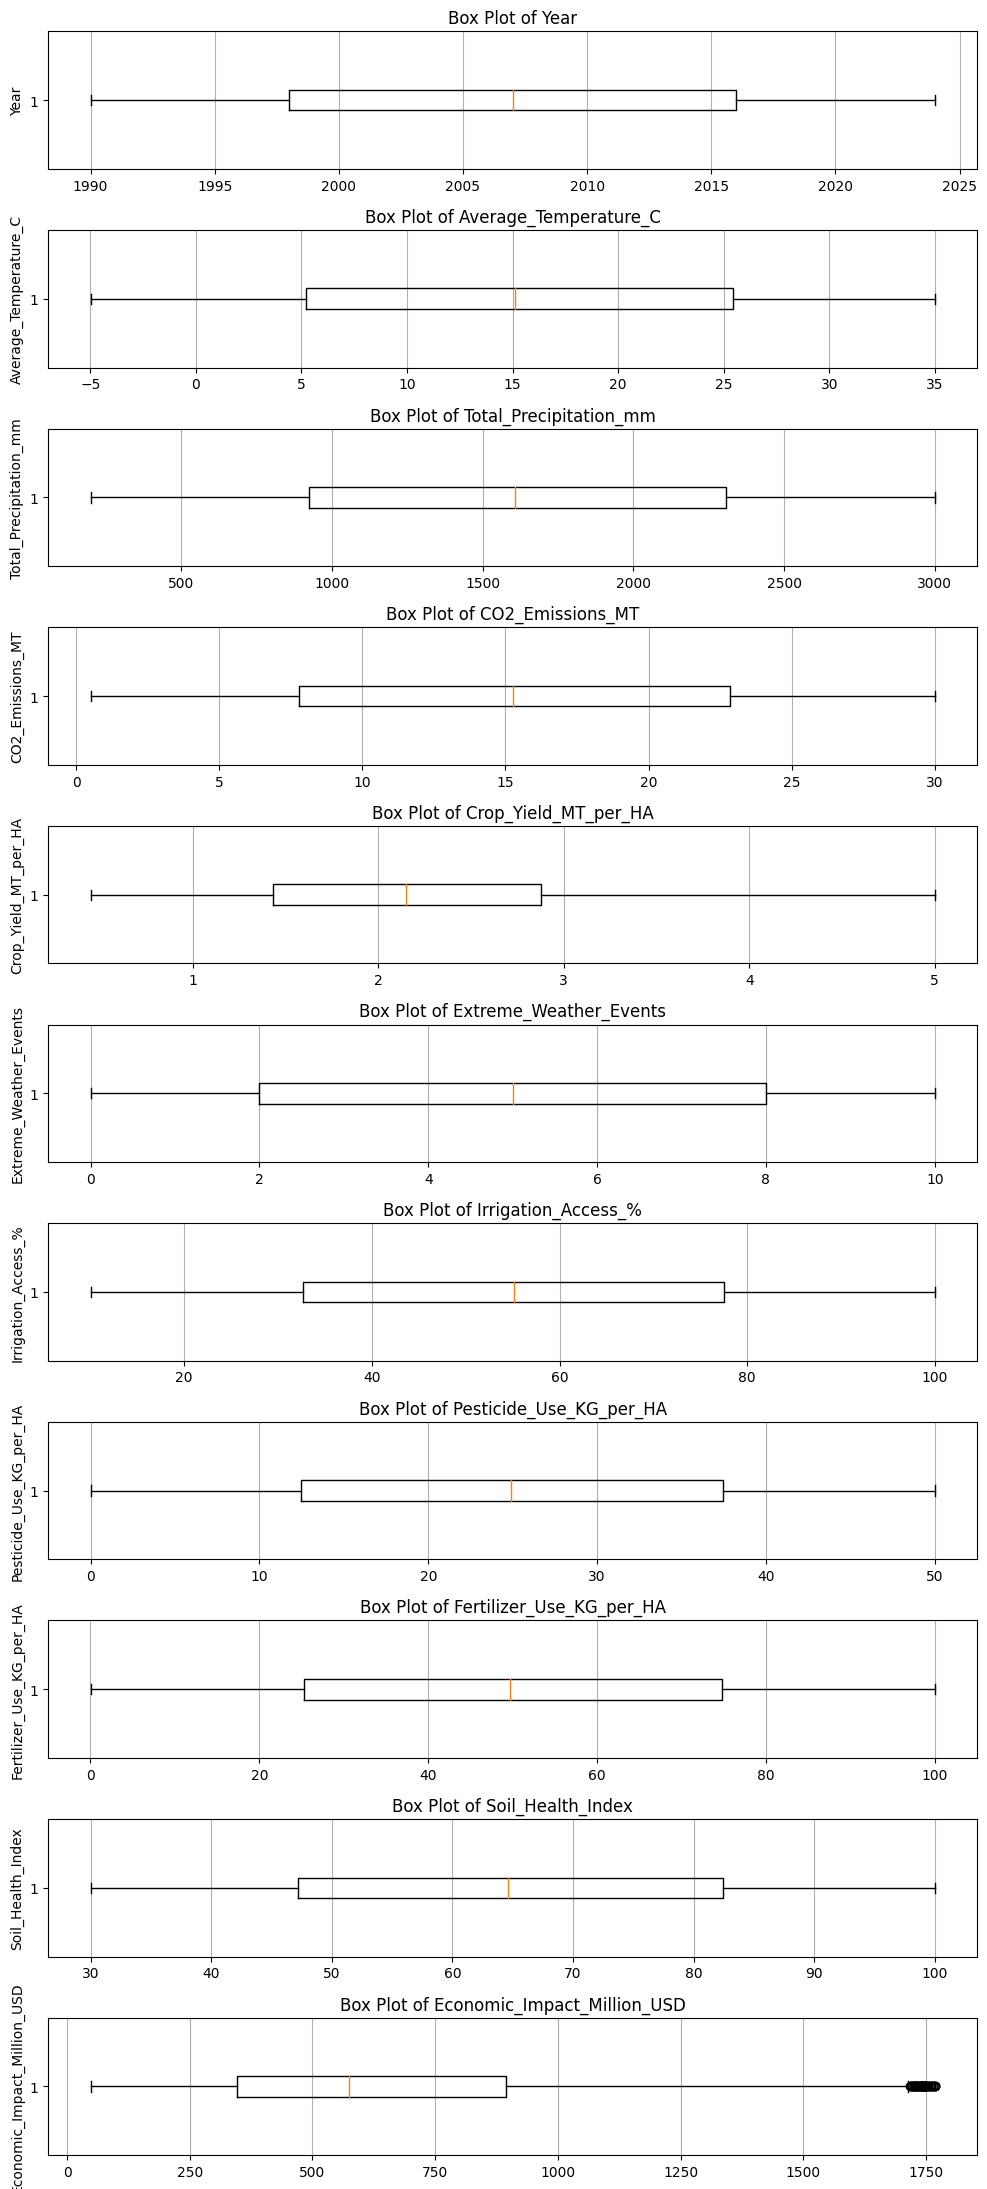

In [14]:
# Create a figure with multiple vertical subplots, one for each column
fig, axs = plt.subplots(num_columns, 1, figsize=(10, num_columns * 2))


for i, col in enumerate(cleaned_data_numeric_cols):
    # Create a horizontal box plot for the current column
    axs[i].boxplot(cleaned_data[col], vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].grid(axis='x')

plt.tight_layout()

plt.show()

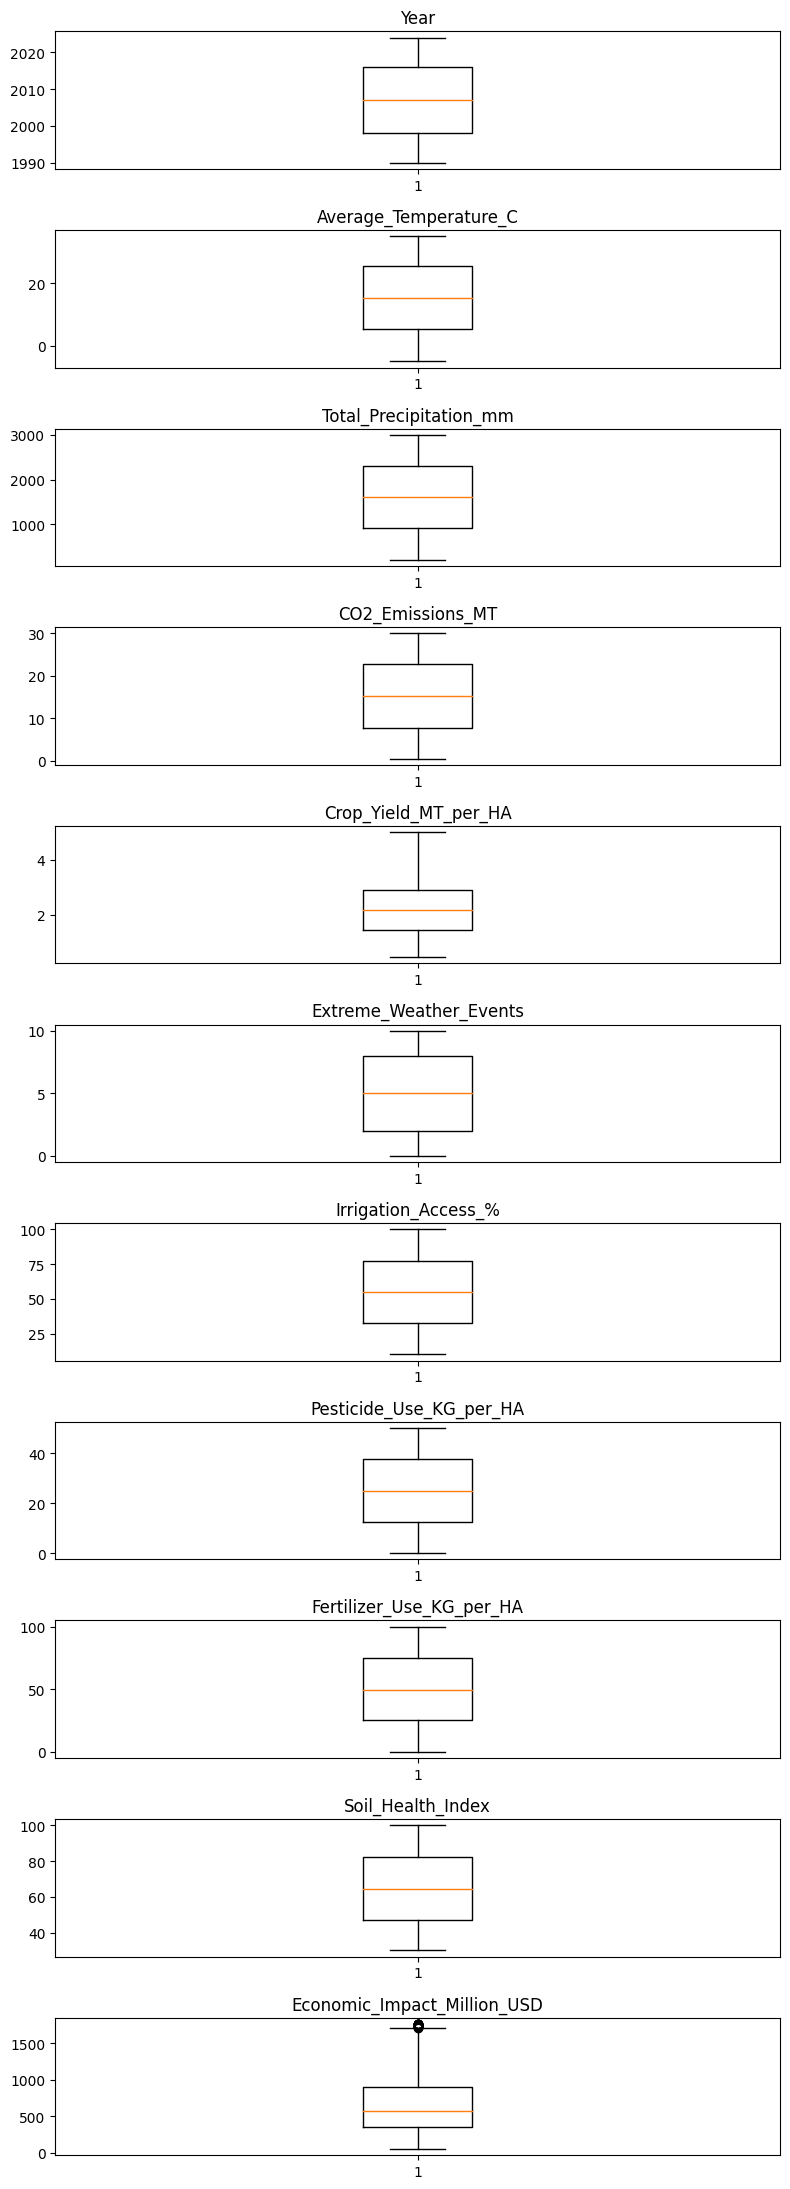

In [15]:
# Creating subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(8, num_columns * 2))

# Looping through each column and create a vertical box plot
for i, col in enumerate(cleaned_data_numeric_cols):
    axs[i].boxplot(cleaned_data[col])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [16]:
# Create a DataFrame with box plots for each column
fig = px.box(cleaned_data[numeric_cols])

fig.show()

In [17]:
# Create a list to hold all the box plot traces
fig = go.Figure()

for col in cleaned_data[numeric_cols].columns:
    fig.add_trace(go.Box(y=cleaned_data[col], name=col))

fig.update_layout(
    title="Interactive Box Plots",
    xaxis_title="Columns",
    yaxis_title="Values",
    showlegend=False
)

fig.show()

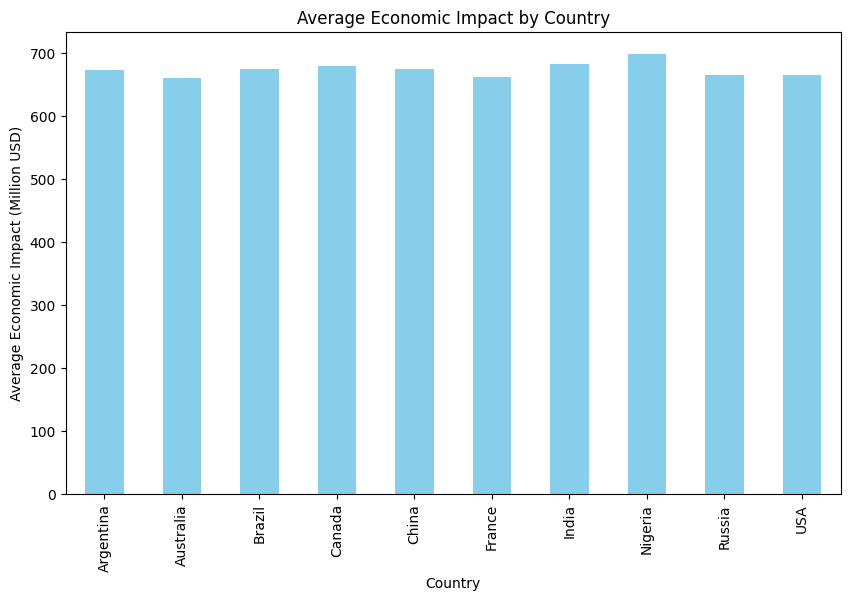

In [18]:
# Plotting average Economic Impact by Country
plt.figure(figsize=(10, 6))
data.groupby('Country')['Economic_Impact_Million_USD'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Economic Impact by Country')
plt.xlabel('Country')
plt.ylabel('Average Economic Impact (Million USD)')
plt.xticks(rotation=90)
plt.show()

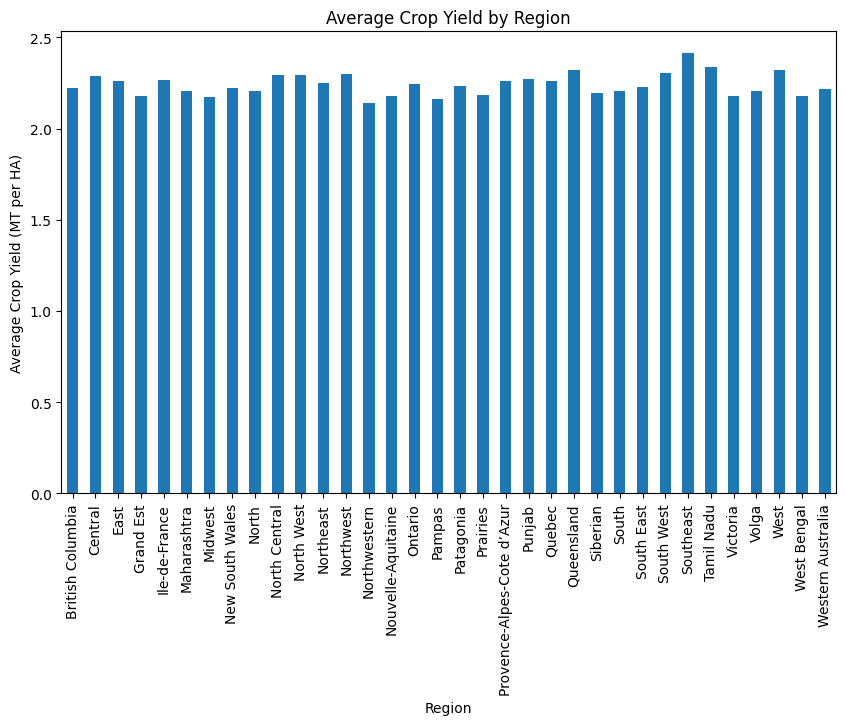

In [19]:
# Plotting the crop yield with respect to the region
plt.figure(figsize=(10, 6))
data.groupby('Region')['Crop_Yield_MT_per_HA'].mean().plot(kind='bar')
plt.title('Average Crop Yield by Region')
plt.xlabel('Region')
plt.ylabel('Average Crop Yield (MT per HA)')
plt.xticks(rotation=90)
plt.show()

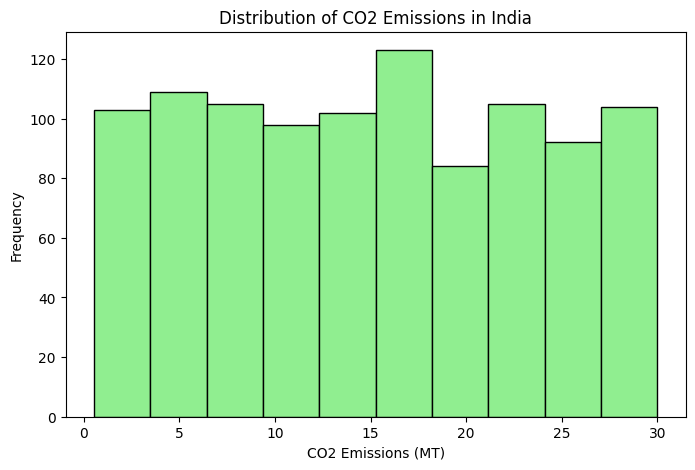

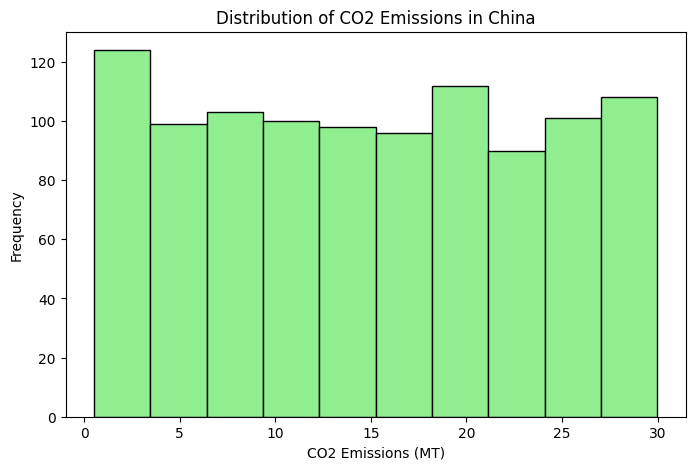

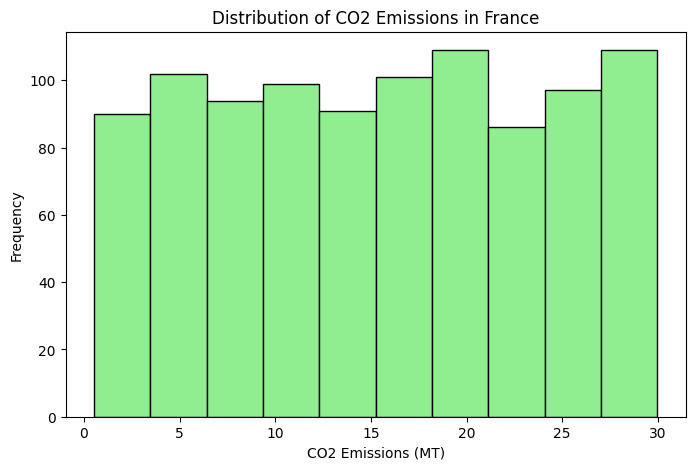

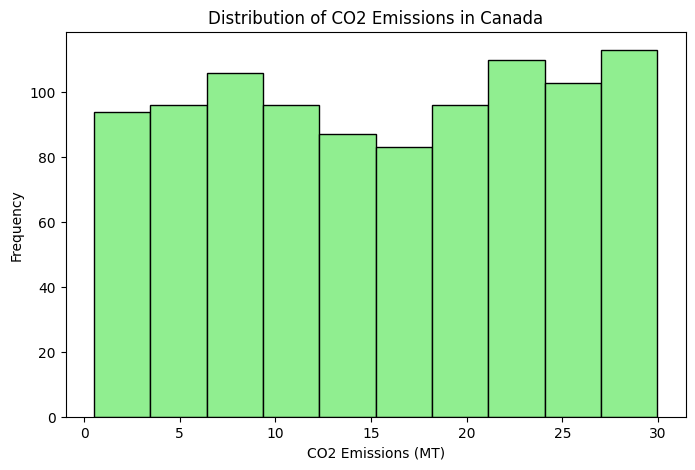

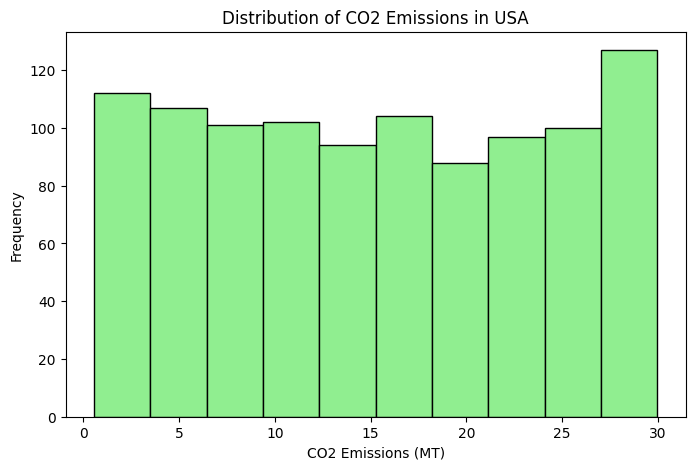

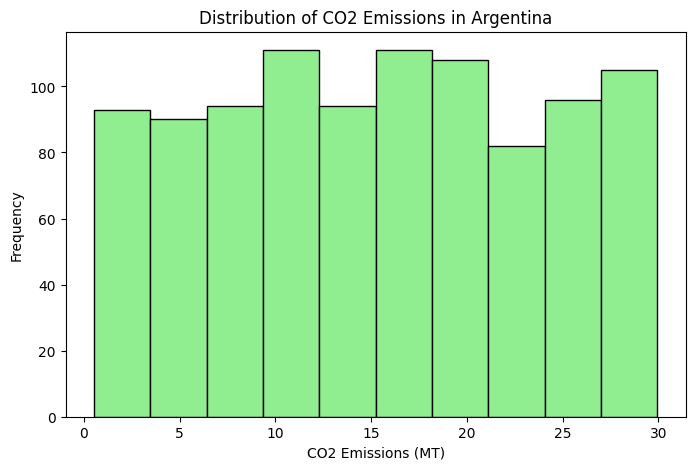

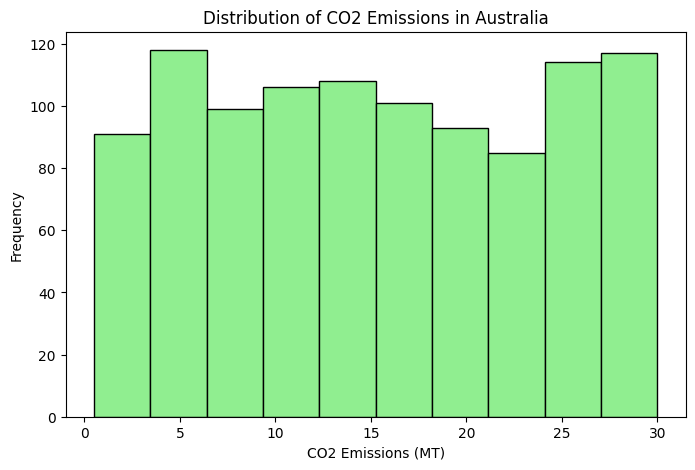

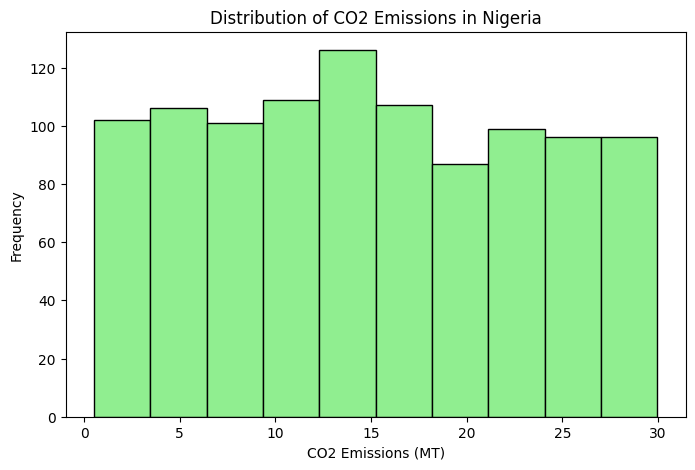

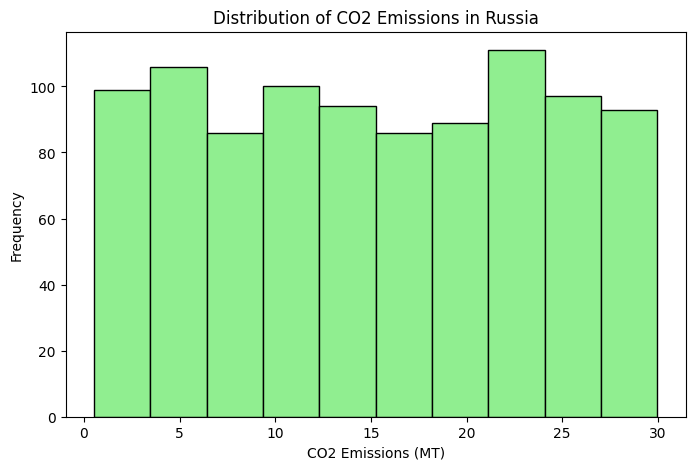

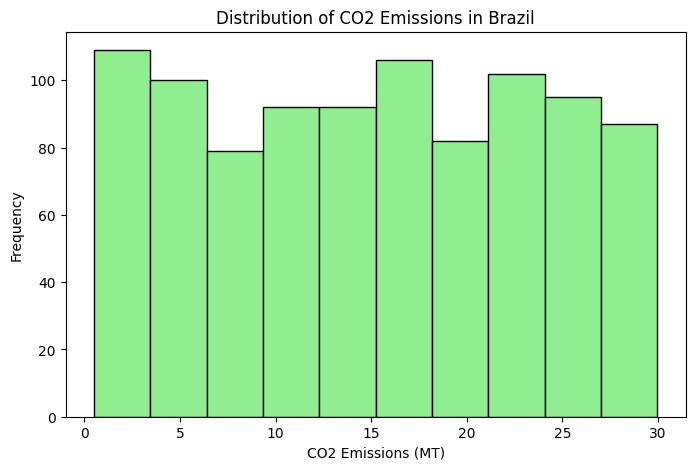

In [20]:
countries = data['Country'].unique()

# Plotting histograms of CO2 emissions for each country
for country in countries:
    plt.figure(figsize=(8, 5))
    country_data = data[data['Country'] == country]  # Filter data for each country
    plt.hist(country_data['CO2_Emissions_MT'], bins=10, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of CO2 Emissions in {country}')
    plt.xlabel('CO2 Emissions (MT)')
    plt.ylabel('Frequency')
    plt.show()

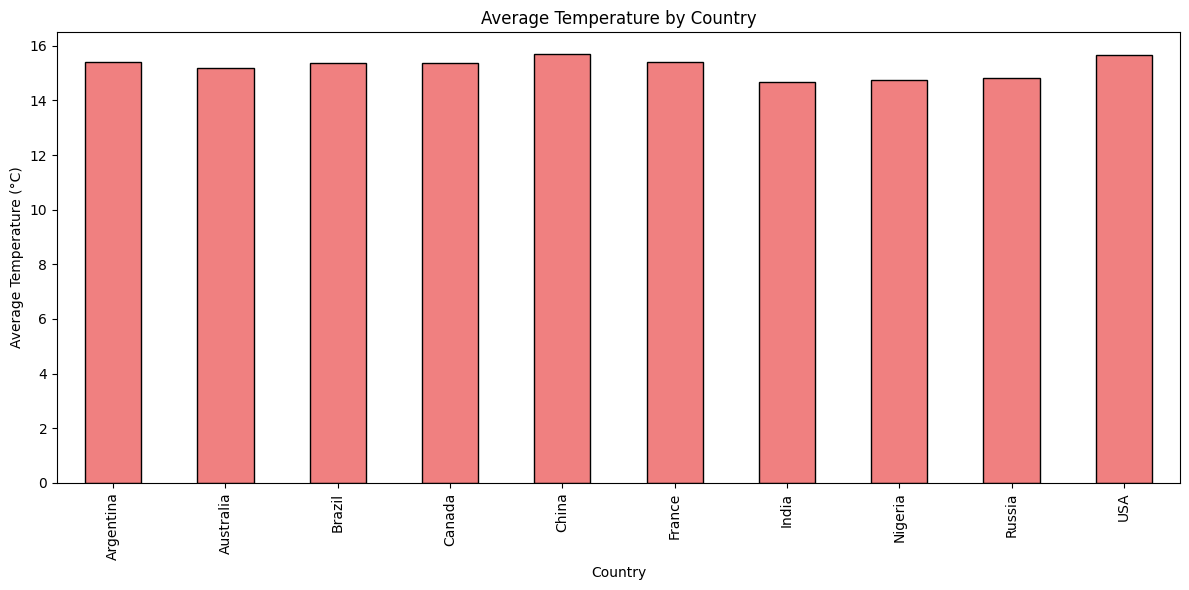

In [21]:
# Plotting Average Temperature by Country
plt.figure(figsize=(12, 6))

data.groupby('Country')['Average_Temperature_C'].mean().plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


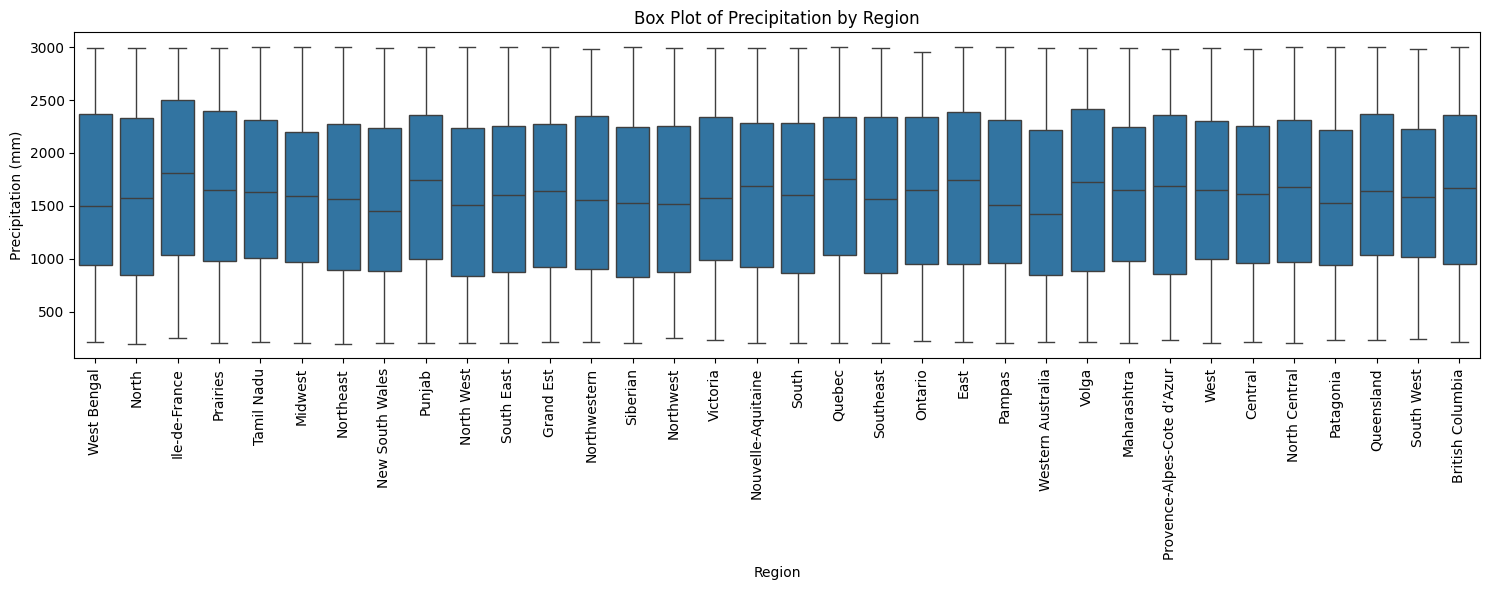

In [22]:
# Box plot to show precipitation with respect to region
plt.figure(figsize=(15, 6))

sns.boxplot(x='Region', y='Total_Precipitation_mm', data=data)

plt.title('Box Plot of Precipitation by Region')
plt.xlabel('Region')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


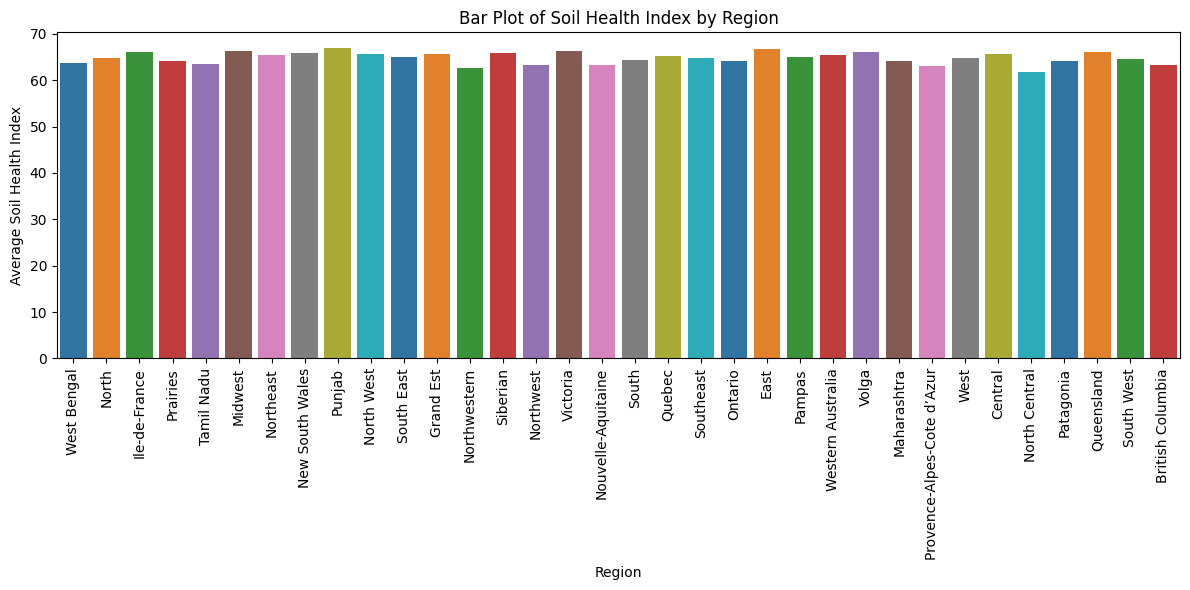

In [23]:
# Bar plot to show mean soil health index with respect to region
plt.figure(figsize=(12, 6))

sns.barplot(x='Region', y='Soil_Health_Index',hue="Region", data=data, palette='tab10', errorbar=None)

plt.title('Bar Plot of Soil Health Index by Region')
plt.xlabel('Region')
plt.ylabel('Average Soil Health Index')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

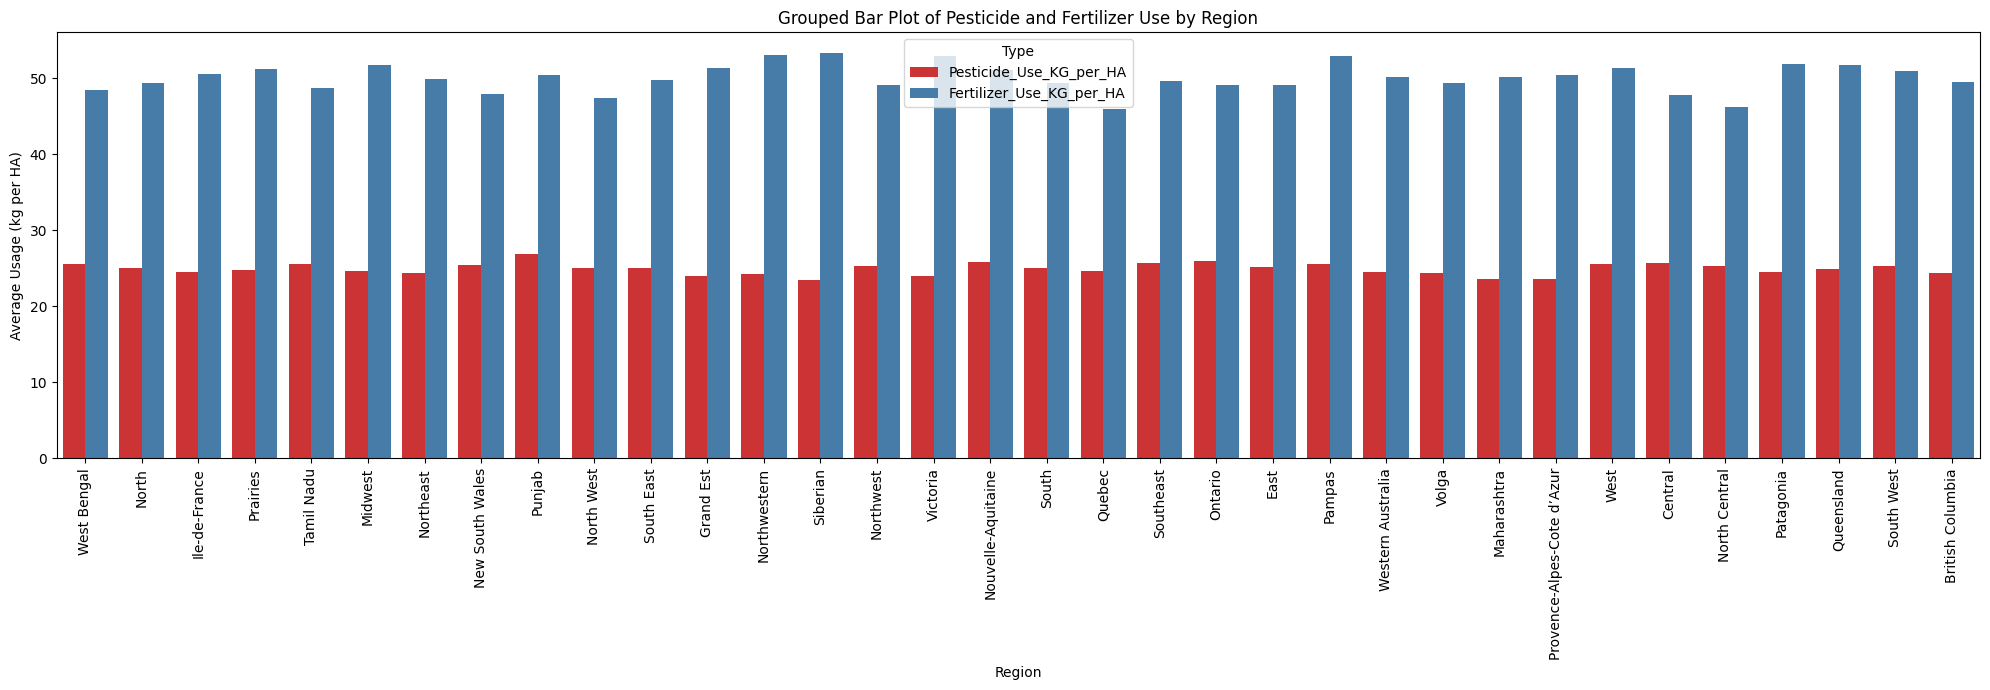

In [24]:
# Bar plot showing the pesticide and fertilizer use with respect to the regions
plt.figure(figsize=(20, 7))

data_melted = data.melt(id_vars='Region', value_vars=['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA'],
                        var_name='Type', value_name='Usage')

sns.barplot(x='Region', y='Usage', hue='Type', data=data_melted, palette='Set1', errorbar=None)

plt.title('Grouped Bar Plot of Pesticide and Fertilizer Use by Region')
plt.xlabel('Region')
plt.ylabel('Average Usage (kg per HA)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


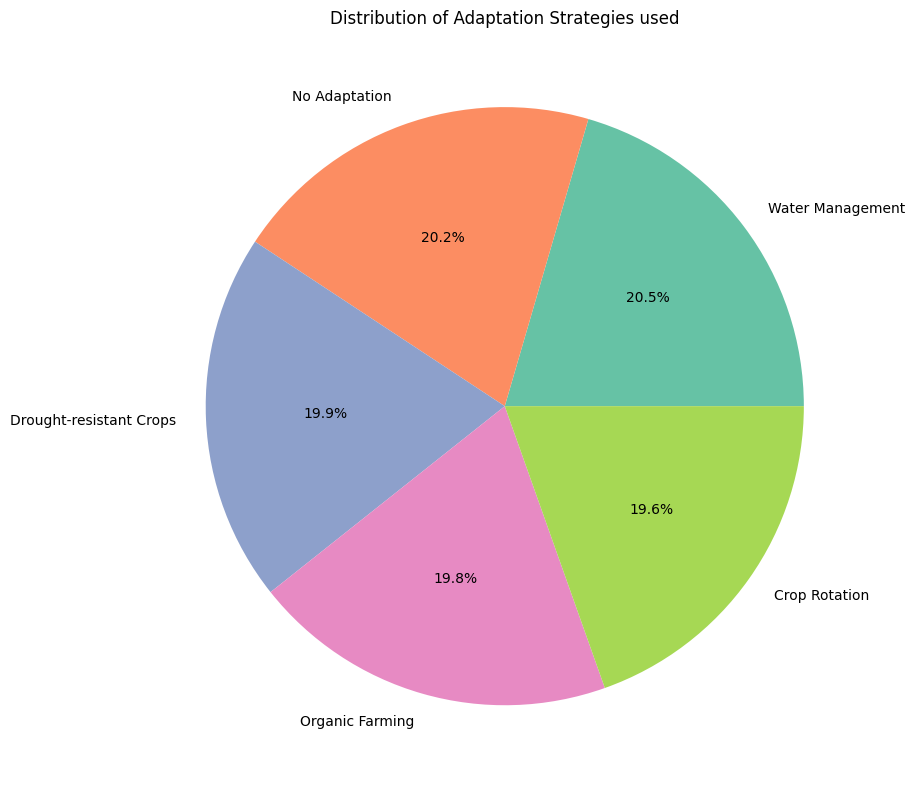

In [25]:
# Pie Chart of Adaptation Strategies adopted all over

strategy_counts = data['Adaptation_Strategies'].value_counts()

plt.figure(figsize=(10, 8))

plt.pie(strategy_counts, labels=strategy_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

plt.title('Distribution of Adaptation Strategies used')

plt.tight_layout()
plt.show()


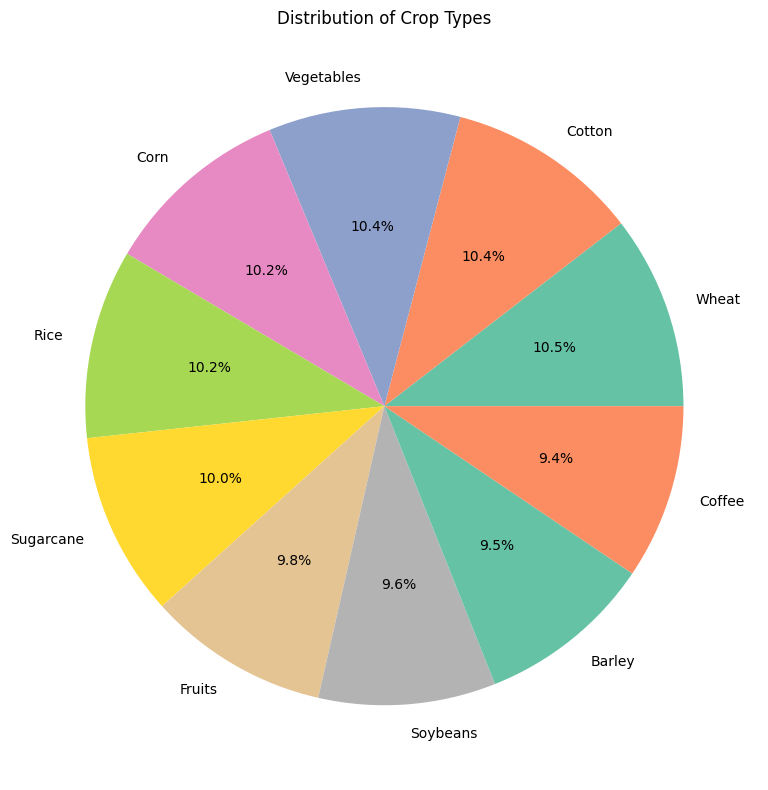

In [26]:
# Pie Chart of Crop Type distribution

strategy_counts = data['Crop_Type'].value_counts()

plt.figure(figsize=(10, 8))

plt.pie(strategy_counts, labels=strategy_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

plt.title('Distribution of Crop Types')

plt.tight_layout()
plt.show()
